In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
final_data = pd.read_excel('Final Data.xlsx',index_col=0)

final_data.head()

,tconst,titleType,primaryTitle,startYear,genres,averageRating,numVotes,adjusted_rating,original_language
0,tt0000009,movie,Miss Jerry,1894,Romance,5.4,224,5.56,en
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport",5.3,558,5.39,en
2,tt0000574,movie,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,987,6.01,en
3,tt0000591,movie,The Prodigal Son,1907,Drama,5.6,31,5.96,fr
4,tt0000615,movie,Robbery Under Arms,1907,Drama,3.9,28,5.46,en


In [3]:
final_data['Primary Genre'] = final_data['genres'].apply(lambda x: x.split(',')[0])
final_data.head()

,tconst,titleType,primaryTitle,startYear,genres,averageRating,numVotes,adjusted_rating,original_language,Primary Genre
0,tt0000009,movie,Miss Jerry,1894,Romance,5.4,224,5.56,en,Romance
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport",5.3,558,5.39,en,Documentary
2,tt0000574,movie,The Story of the Kelly Gang,1906,"Action,Adventure,Biography",6.0,987,6.01,en,Action
3,tt0000591,movie,The Prodigal Son,1907,Drama,5.6,31,5.96,fr,Drama
4,tt0000615,movie,Robbery Under Arms,1907,Drama,3.9,28,5.46,en,Drama


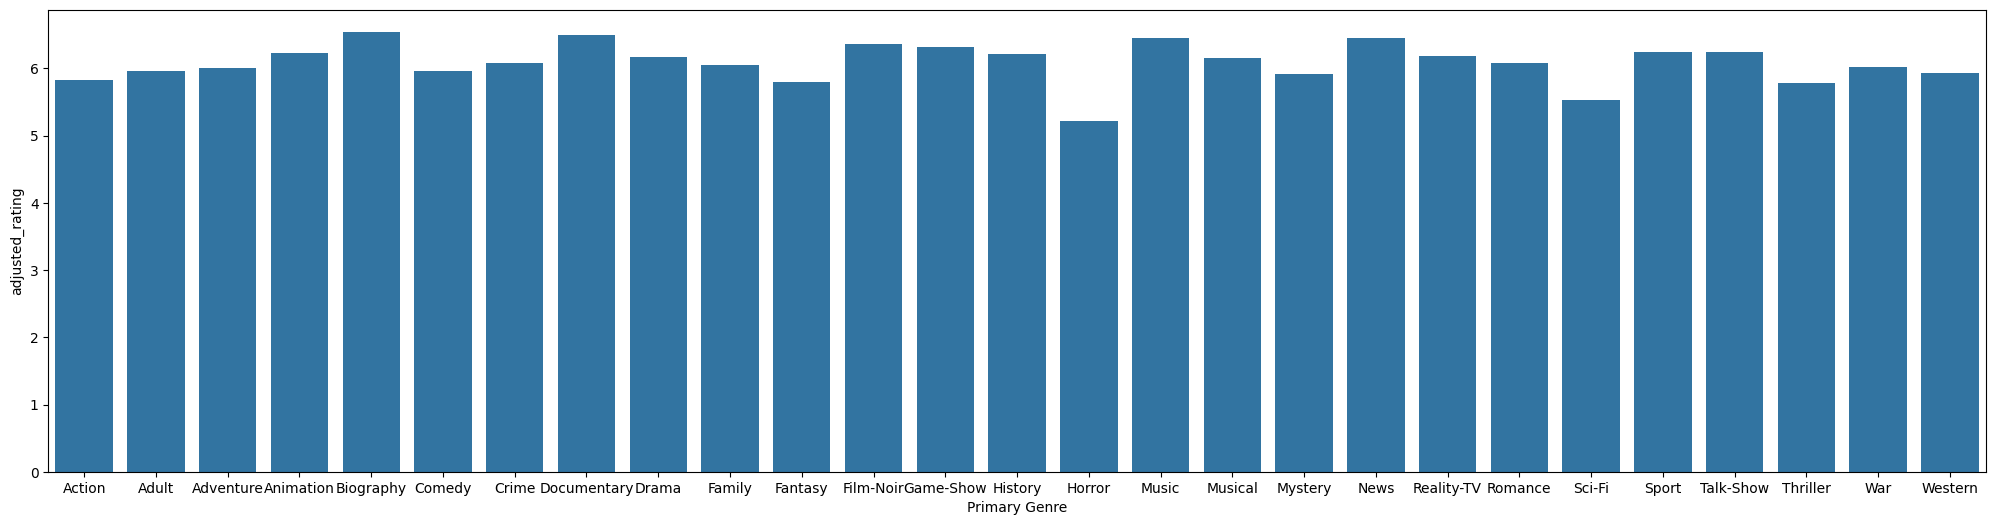

In [12]:
genre_tab = final_data.groupby('Primary Genre')['adjusted_rating'].mean().to_frame()
genre_tab.head()
plt.figure(figsize=(25,6))
sns.barplot(x=genre_tab.index,y=genre_tab.adjusted_rating)
plt.show();

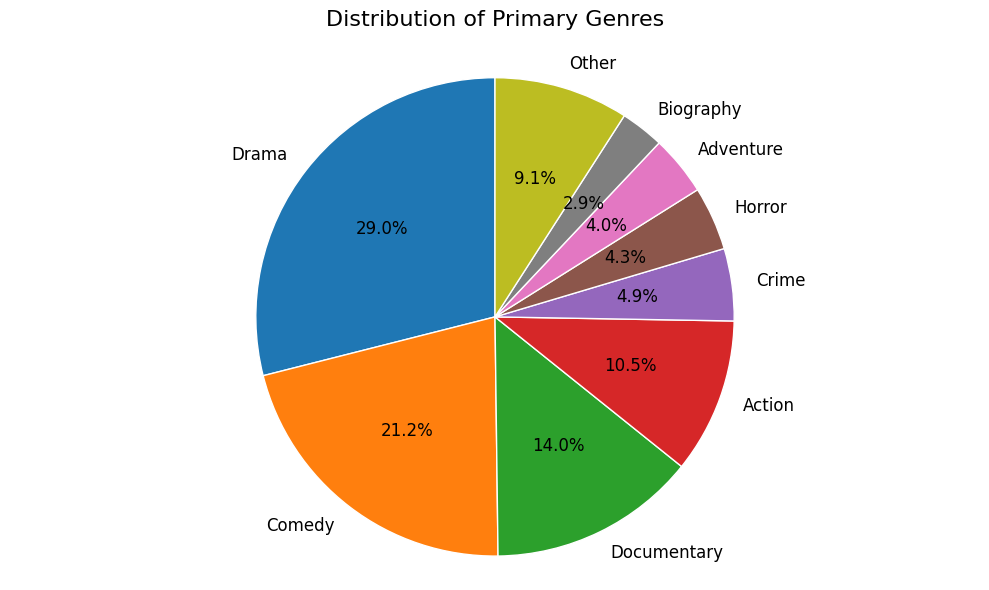

In [ ]:
threshold = 0.02  # 2% threshold
genre_counts = final_data['Primary Genre'].value_counts(normalize=True)
other = genre_counts[genre_counts < threshold].sum()
genre_counts = genre_counts[genre_counts >= threshold]
genre_counts['Other'] = other

plt.figure(figsize=(10, 6))
plt.pie(
    genre_counts, 
    labels=genre_counts.index, 
    autopct='%1.1f%%',
    startangle=90,      
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},  
    textprops={'fontsize': 12}
)

plt.axis('equal')  
plt.title('Distribution of Primary Genres', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

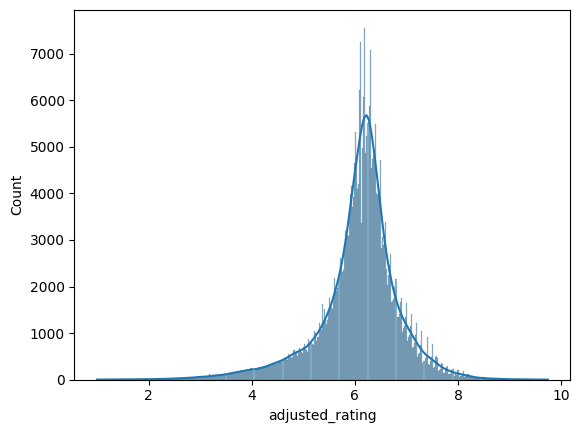

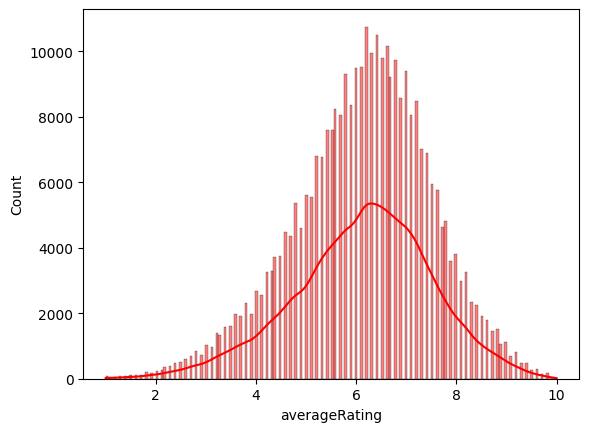

In [11]:
sns.histplot(final_data['adjusted_rating'],kde=True, edgecolor='black')
plt.show();
sns.histplot(final_data['averageRating'],kde=True, color='red', edgecolor='black')
plt.show();